# Day 17

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

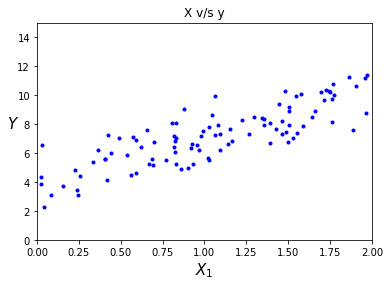

In [47]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X,y,"b.")
plt.xlabel ("$X_1$", fontsize=15)
plt.ylabel ("$Y$", rotation =0, fontsize=15)
plt.axis([0,2,0,15])
plt.title("X v/s y")
plt.savefig("linearPlot")

In [48]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.92259893]
 [3.14286917]]


In [49]:
# Now we make prediction using theta
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((len(X_new),1)),X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.92259893]
 [10.20833727]]


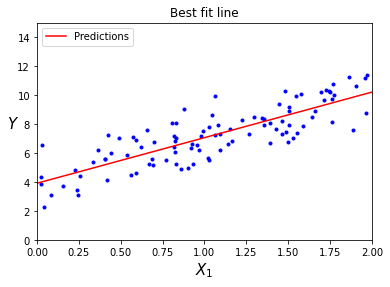

In [50]:
# Plotting the model
plt.plot(X,y,"b.")
plt.plot(X_new,y_predict, "r-", label = "Predictions")
plt.xlabel ("$X_1$", fontsize=15)
plt.ylabel ("$Y$", rotation =0, fontsize=15)
plt.axis([0,2,0,15])
plt.title("Best fit line")
plt.legend(loc="upper left")
plt.savefig("bestfitLine")

In [51]:
# Performing Linear regression with Scikit library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_)
print(lin_reg.coef_)


[3.92259893]
[[3.14286917]]


In [52]:
# Predicting the value via the linear regression model
lin_reg.predict(X_new)

array([[ 3.92259893],
       [10.20833727]])

In [53]:
# Deriving Theta values from lstq function
theta_best_svd, residual, rank,s  = np.linalg.lstsq(X_b, y, rcond = 1e-6)
print(theta_best_svd)

[[3.92259893]
 [3.14286917]]


In [54]:
# Deriving theta value using Moore-penrose inverse
theta_best_new = np.linalg.pinv(X_b).dot(y)
print(theta_best_new)

[[3.92259893]
 [3.14286917]]


# Day 18

[[3.90917214]
 [3.17489016]]
1000


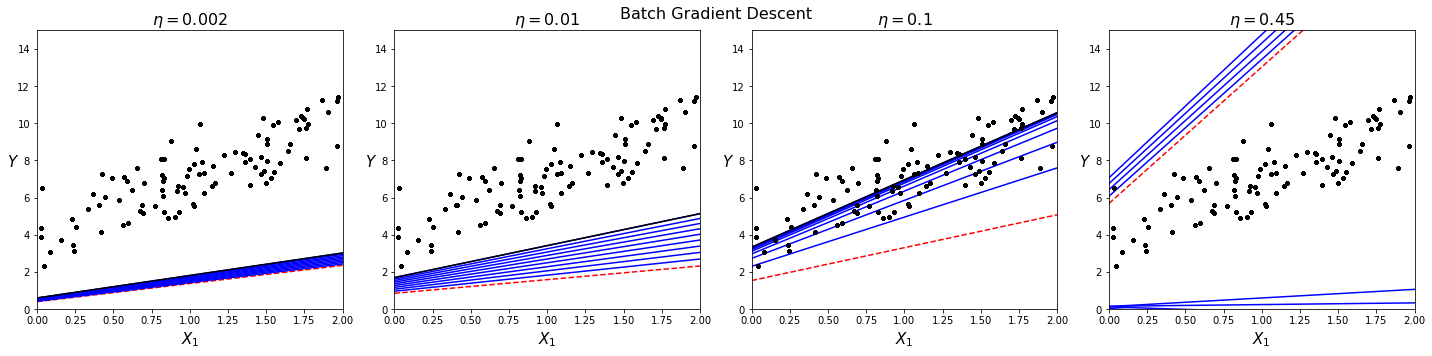

In [90]:
# Batch Gradient Descent
np.random.seed(42)
theta_path_bgd = []
n_iteration = 1000
m = 100
    
def getVal(theta_best):
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((len(X_new),1)),X_new]
    y_predict = X_new_b.dot(theta_best)
    return X_new, y_predict

def plot_gradient_descent(learn,theta_path=None):
    theta = np.random.rand(2,1)
    for i in range(n_iteration):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learn*gradients
        plt.plot(X, y, "k.")
        if (i < 10):
            X_new,y_predict = getVal(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new,y_predict, style)
        if (i == 999):
            plt.plot(X_new,y_predict, "k-")
        plt.xlabel ("$X_1$", fontsize=15)
        plt.ylabel ("$Y$", rotation =0, fontsize=15)
        plt.axis([0,2,0,15])
        plt.title(f"$\eta = {learn}$", fontsize=16)
        if theta_path is not None:
          theta_path.append(theta)

learn = [0.002,0.01,0.1,0.45]
val = 141
plt.figure(figsize=(20,5))
plt.ylabel("$y$", rotation=0, fontsize=18)
theta_append=False
for lr in learn:
    plt.suptitle("Batch Gradient Descent",fontsize=16)
    if lr == 0.1:
      plt.subplot(val);plot_gradient_descent(lr,theta_path=theta_path_bgd)
    else:
      plt.subplot(val);plot_gradient_descent(lr)
    plt.tight_layout()
    val=val+1

plt.savefig("batch")
print(theta)
print(len(theta_path_bgd))

[[3.90917214]
 [3.17489016]]


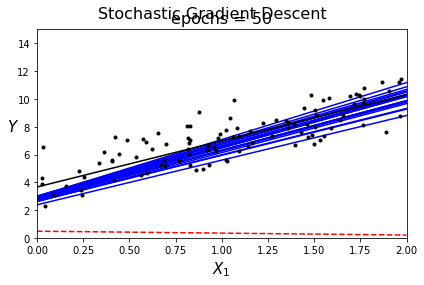

In [64]:
# Stochastic Gradient Descent

np.random.seed(42)
theta_path_sgd = []
epochs=50
theta = np.random.randn(2,1)
m = 100
t0=5
t1=50

def learning_schedule(t):
    return t0 / (t + t1)
    
for ep in range(epochs):
    for i in range(m):
        if (ep == 0 and i<20):
            y_predict = X_new_b.dot(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new,y_predict, style)
        if (ep == 0 and i==99):
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict, "k-")
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(ep*m +i)
        theta = theta - lr * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "k.")
plt.suptitle("Stochastic Gradient Descent",fontsize=16) 
plt.xlabel ("$X_1$", fontsize=15)
plt.ylabel ("$Y$", rotation =0, fontsize=15)
plt.axis([0,2,0,15])
plt.title(f"epochs = {epochs}", fontsize=16)
plt.tight_layout()
plt.savefig("stochastic")
print(theta)


# Day 19

[[3.96464878]
 [3.20834723]]


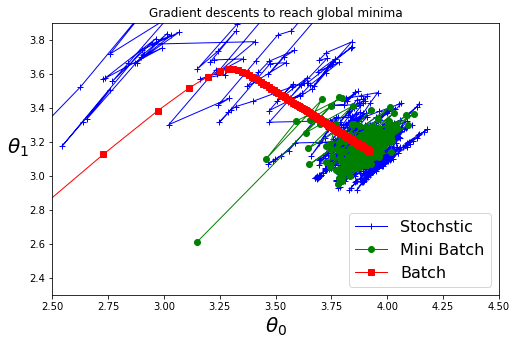

In [105]:
# Mini Batch Gradient Descent
theta_path_mgd=[]
np.random.seed(42)
epochs=50
theta = np.random.randn(2,1)
m = 100
mini_batch = 20
t0=200
t1=1000
t=0

def learning_schedule(t):
    return t0 / (t + t1)
    
for ep in range(epochs):
    shuffled_index = np.random.permutation(m)
    X_b_shuff = X_b[shuffled_index]
    y_shuff = y[shuffled_index]
    for i in range(0,m,mini_batch): 
        t += 1
        xi =  X_b_shuff[i: mini_batch+i]
        yi =  y_shuff[i: mini_batch+i] 
        gradients = 2/mini_batch * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(t)
        theta = theta - lr * gradients
        theta_path_mgd.append(theta)

print(theta)

# Plotting the Theta values for different gradient descents
theta_path_bgd = np.array (theta_path_bgd)
theta_path_sgd = np.array (theta_path_sgd)
theta_path_mgd = np.array (theta_path_mgd)

plt.figure(figsize=(8,5))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "b-+", linewidth=1, label="Stochstic")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], "g-o", linewidth=1, label="Mini Batch")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "r-s", linewidth=1, label="Batch")
plt.legend(loc="lower right", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.title("Gradient descents to reach global minima")
plt.savefig("GD_flow")
plt.show()

100
100
[False]
[[0.93366893 0.56456263]]
[1.78134581]


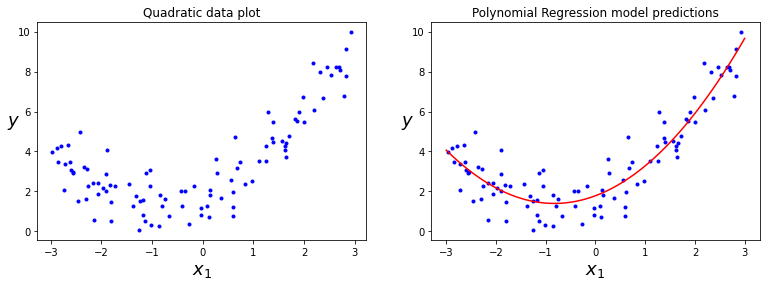

In [179]:
# Polynomial Regression
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = ax2 + bx + c.
print(len(X))
print(len(y))

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)          # contains 1,X and X square
print(X[0] == X_poly[0][1])

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly,y)
print(lr.coef_)
print(lr.intercept_)
plt.figure(figsize=(20,4))
plt.subplot(131)
plt.plot(X,y,"b.")
plt.title ("Quadratic data plot")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_predict = lr.predict(X_new_poly)
plt.subplot(132)
plt.plot(X,y,"b.")
plt.plot(X_new,y_predict,"r-", label="Preciction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Polynomial Regression model predictions")
plt.savefig("ploy_plot")